<a href="https://colab.research.google.com/github/nikhilbordekar/Yes-Bank-s-Stock-Closing-Price-Prediction-by-Regression/blob/main/Capstone_2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction by Regression.


##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Gunjal
##### **Team Member 2 -** Nikhil Bordekar
##### **Team Member 3 -** Aniket Kale


# **Project Summary -**

Yes Bank stock closing price prediction by regression involves using historical data to develop a regression model that can forecast future stock prices. Regression analysis is a statistical method that uses a combination of independent variables to predict the value of a dependent variable, in this case, the stock price. Here we are gonna develope different Regression model to predict the Closing stock price. On the basis of different metrics, we are gonna evaluate our model and try to find the best model of it. Also try to gain some insights in feature importance using various methods.

# **GitHub Link -**

***https://github.com/nikhilbordekar***

# **Problem Statement**


The problem statement for developing a Yes Bank stock closing price prediction ML model is to create an accurate and reliable forecasting model. The model should be trained on a subset of historical data and validated on another subset to ensure that it can accurately predict future stock prices. The ultimate objective is to create a robust and accurate model that can help to predict Yes Bank stocks Closing price.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [ ]:
# Load Dataset
data=pd.read_csv("/content/data_YesBank_StockPrices.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

### What did you know about your dataset?

According to the analysis above, the dataset comprises 5 columns and 185 rows. where just one column is in float format and the others are formatted as dates. This data does not contain any Null values and duplicate rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description 

There are 5 variable in data as follows

**Independent Variable**

1. Date : It has Month and Year.
2. Open : Opening stock price for respective Month.
3. High : Highest sotck price for respective Month.
4. Low : Lowest stock price for respective Month.

**Dependent Variable**
5. Close : Closing price of Stock for respective Month

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Converting Date column from object format to Date
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')

In [ ]:
data['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

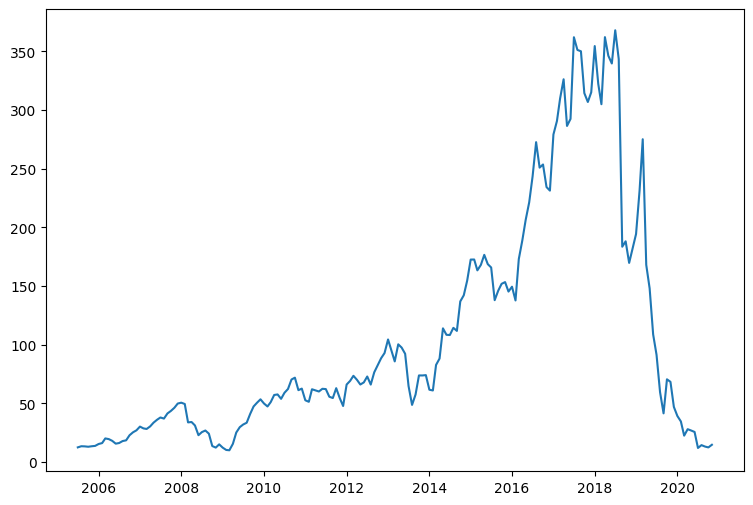

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(data['Date'],data['Close'])

In [ ]:
# Taking a Numerical Feature from Data
numeric_fea=data.describe().columns
numeric_fea

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

### What all manipulations have you done and insights you found?

Converted Date column to Date Format by using Datetime Library. To get better visualisation about Date and Closing price of Stock.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<Axes: xlabel='Close', ylabel='Density'>

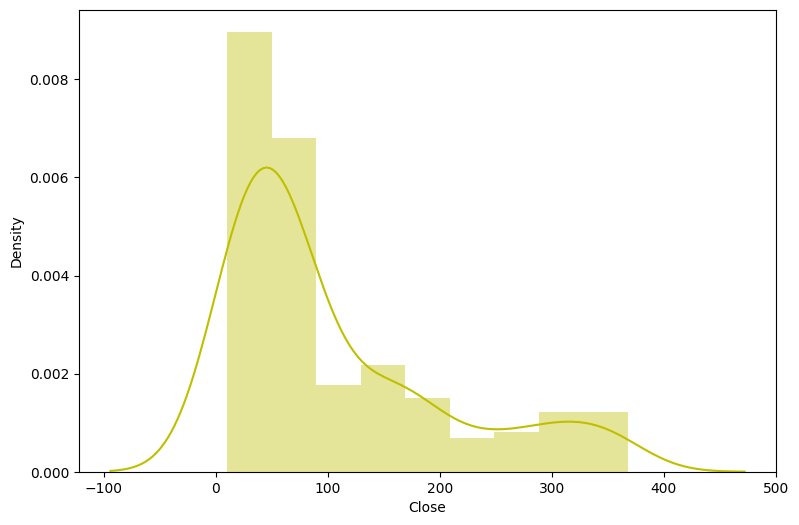

In [ ]:
# Chart - 1 visualization code
# Doing Visualisation of Distributed Data for Close column.
plt.figure(figsize=(9,6))
sns.distplot(data['Close'],color='y')

<Axes: xlabel='Close', ylabel='Density'>

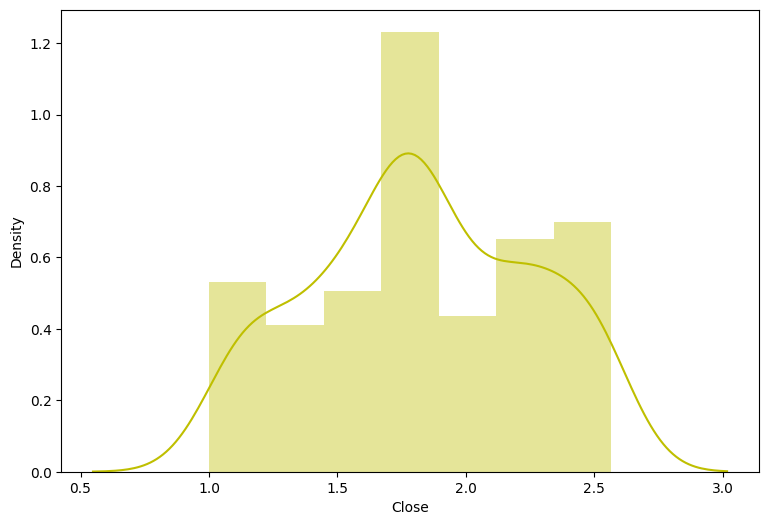

In [ ]:
# Normalizing the close column data by using log transformation.
plt.figure(figsize=(9,6))
sns.distplot(np.log10(data["Close"]),color='y')

##### 1. Why did you pick the specific chart?

Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide useful insights into its distribution, shape, and potential outliers.

By visualizing the distribution of the target variable, we can gain a better understanding of its central tendency (i.e., the mean, median, and mode), spread (i.e., the range, variance, and standard deviation), skewness (i.e., whether it's symmetric or skewed), and any potential outliers.

This information can be helpful in selecting an appropriate ML algorithm for predicting the target variable, as well as in identifying any potential issues with the data (e.g., non-normality, extreme values) that may need to be addressed before training the model.

##### 2. What is/are the insight(s) found from the chart?

Yes Bank stock closing price prediction ML model, a distribution plot of the closing price can provide several insights, including:
1. The shape of the distribution: The shape of the distribution is skewed right (i.e., positively skewed). A skewed distribution suggests that the closing price is more concentrated on one side of the mean. So for having better model we need to make our target variable symmetrically distributed by using log transformation.
2. The presence of outliers: Outliers are data points that are significantly different from the rest of the data. By examining the distribution plot, we can identify any potential outliers that may need to be addressed before training the model.

#### Chart - 2

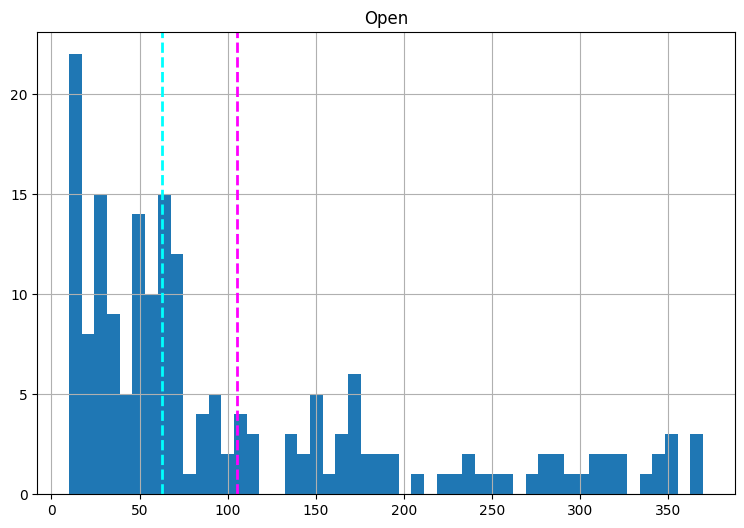

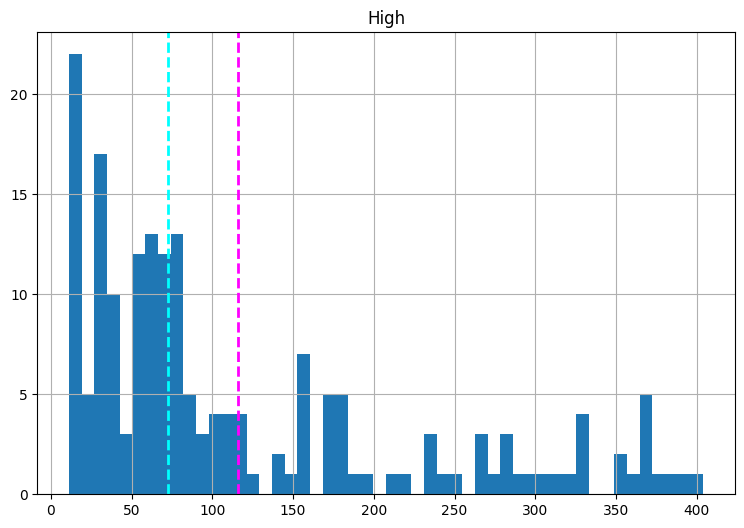

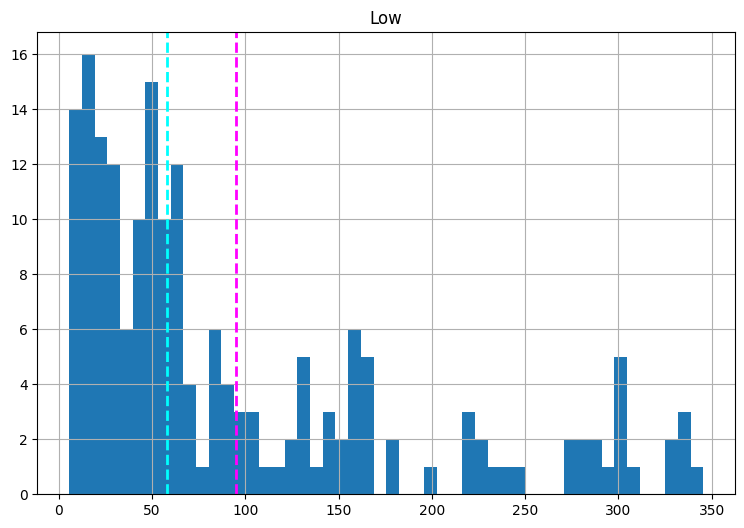

In [ ]:
# Chart - 2 visualization code
# Plotting Histogram for each independent column in Data. 
for col in numeric_fea[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are used to visualize the distribution of a single variable. Here histograms used to visualize the distribution of independent variables.
We also plotted mean and median lines for better understanding of skewness of data.

##### 2. What is/are the insight(s) found from the chart?

The shape of the distribution of independent variables skewed right. This information can help to determine the appropriate statistical approach for regression.

#### Chart - 3

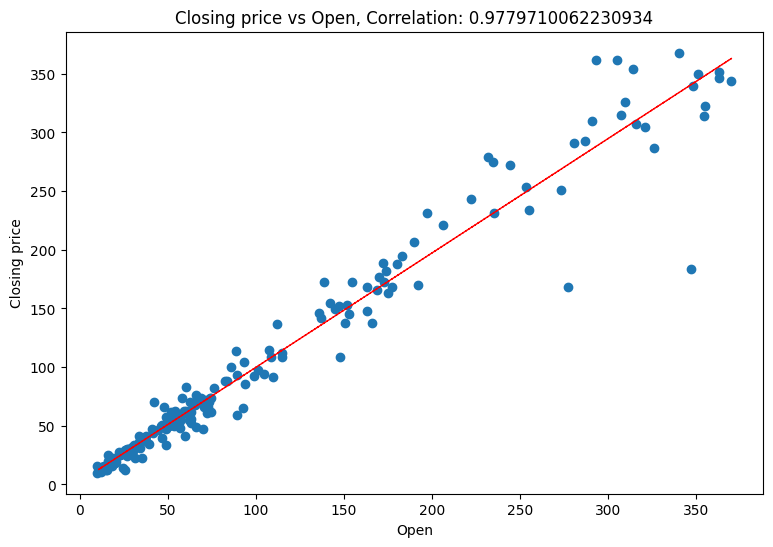

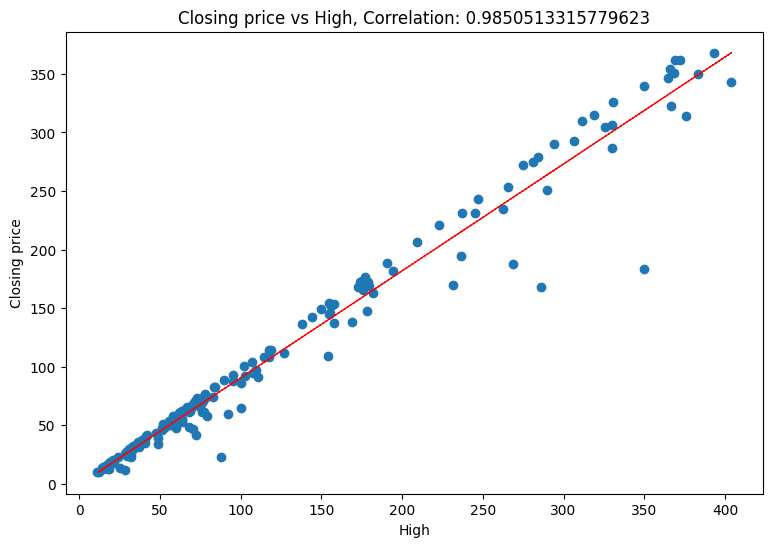

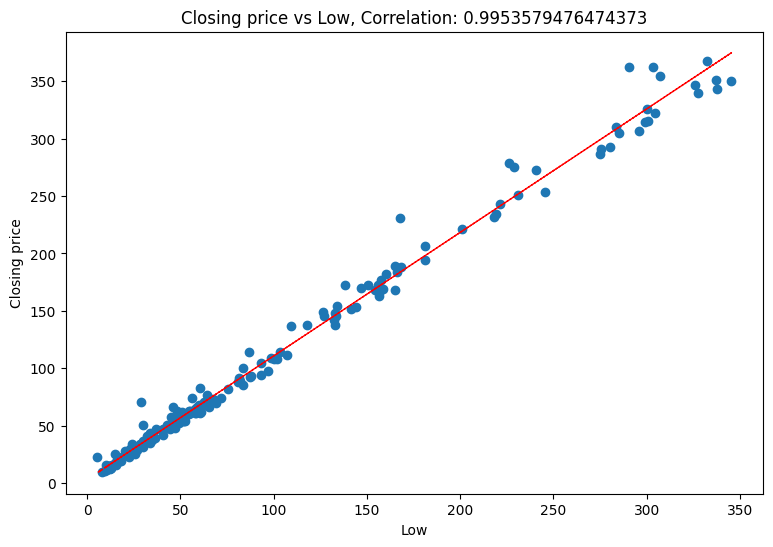

In [ ]:
# Chart - 3 visualization code
# Plotting graph Independent variable vs Dependent variable to check Multicollinearity.
for col in numeric_fea[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  label=data["Close"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.ylabel("Closing price")
  plt.xlabel(col)
  ax.set_title('Closing price vs '+col+', Correlation: '+str(correlation))
  z=np.polyfit(data[col],data['Close'],1)
  y_hat=np.poly1d(z)(data[col])

  plt.plot(data[col],y_hat,"r--",lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is a common and useful visualization technique to explore the relationship between a dependent variable (i.e., Yes Bank stock closing price) and one or more independent variables. In a scatter plot, each observation is represented as a point on the graph, with the independent variable plotted on the x-axis and the dependent variable plotted on the y-axis.

By examining the scatter plot, we can identify any patterns or relationships between the two variables. For example, if the points on the scatter plot are closely clustered around a straight line, this suggests a strong linear relationship between the two variables. On the other hand, if the points on the scatter plot are more spread out and do not appear to form a straight line, this suggests a weaker relationship or no relationship at all.

By examining the scatter plot, we can determine whether there is a strong or weak relationship between the closing price and the independent variable(s), and whether this relationship is linear or nonlinear. This information can be used to inform the selection of appropriate ML algorithms for predicting the closing price, and to identify any potential issues with the data that may need to be addressed before training the ML model.

##### 2. What is/are the insight(s) found from the chart?

From all above graphs we can see that all the independent variable are linearly corelated with dependent variable(i.e., Yes Bank stock closing price). We need to choose appropriate model to deal with multicollinearity in our data.

#### Chart - 4 Correlation Heatmap

<Axes: >

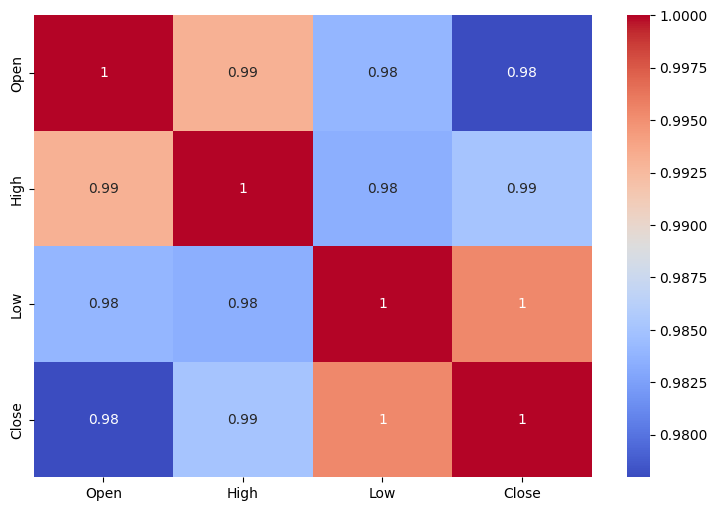

In [ ]:
# Chart - 4 Correlation Heatmap visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(9,6))
cor=data.corr()
sns.heatmap(abs(cor),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmap can be used to explore the correlation between the closing price and the independent variables. By examining the heatmap, we can identify any patterns or relationships between the variables, which can inform the selection of appropriate ML algorithms for predicting the closing price.

A heatmap can also be used to identify any potential issues with the data, such as multicollinearity (i.e., high correlation between independent variables). 

##### 2. What is/are the insight(s) found from the chart?

As from above chart we can see that our data is Multicollinear.
Multicollinearity can cause problems for linear regression, because it can lead to overfitting and unreliable coefficient estimates. By identifying variables with high correlations, we can decide whether to remove one of the variables or to use a different ML algorithm that is less sensitive to multicollinearity.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Data Scaling

In [ ]:
# Scaling your data
data_pr=data.copy() # Making copy of our original data 
# Separate Dependent and Independent variable
X=np.log10(data_pr.iloc[:,1:-1]) # Normalizing the data using log transformation
y=np.log10(data_pr['Close']) # Normalizing the data using log transformation


##### Which method have you used to scale you data and why?

We use log transformation to scale data. Because this method applies a logarithmic transformation to the data, which can help normalize skewed data and reduce the impact of outliers.



### 2. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why? 

Data splitting is a common technique used in machine learning and data analysis to evaluate the performance of a model on an independent dataset. We used 80-20 split to split data.

80:20 split - In this split, the dataset is divided into two parts - training set and testing set. The training set contains 80% of the data, while the testing set contains the remaining 20% of the data. This split is commonly used when the dataset is large and the model requires significant training time. The training set is used to train the model, and the testing set is used to evaluate the model's performance.

## ***7. ML Model Implementation***

### ML Model - 1 Linear Regression

In [ ]:
# ML Model - 1 Implementation
reg=LinearRegression()

# Fit the Algorithm
reg.fit(X_train,y_train)

# Predict on the model
y_pred=reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse=mean_squared_error(10**(y_test),10**(y_pred)) #10** to convert back log10 that we used while making it normalised
rmse=np.sqrt(mse)

r2=r2_score(10**(y_test),10**(y_pred))
Adjusted_R2=(1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [ ]:
eval=pd.DataFrame([mse,rmse,r2,Adjusted_R2,mae],columns=['Linear'],index=['MSE','RMSE','R2','Adj R2','MAE']) # making a DataFrame for our metrics
eval

,Linear
MSE,70.420406
RMSE,8.391687
R2,0.993744
Adj R2,0.993175
MAE,0.017328


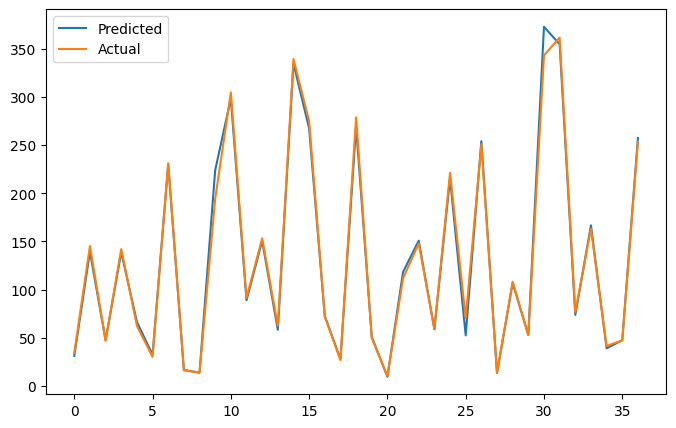

In [ ]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

### ML Model - 2 Linear Regression using Lasso Regularization.

In [ ]:
from sklearn.linear_model import Lasso
# ML Model - 1 Implementation
lasso=Lasso(alpha=0.1)

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_l=lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse_l=mean_squared_error(10**(y_test),10**(y_pred_l)) #10** to convert back log10 that we used while making it normalised
rmse_l=np.sqrt(mse_l)

r2_l=r2_score(10**(y_test),10**(y_pred_l))
Adjusted_R2_l=(1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_l = mean_absolute_error(y_test, y_pred_l)

In [ ]:
eval_l=pd.DataFrame([mse_l,rmse_l,r2_l,Adjusted_R2_l,mae_l],columns=['Lasso'],index=['MSE','RMSE','R2','Adj R2','MAE']) 
eval=pd.concat([eval,eval_l],axis=1) # Concating our metrics of new model into our metrics Dataframe


In [ ]:
eval

,Linear,Lasso
MSE,70.420406,8552.042521
RMSE,8.391687,92.477254
R2,0.993744,0.240217
Adj R2,0.993175,0.171146
MAE,0.017328,0.220050


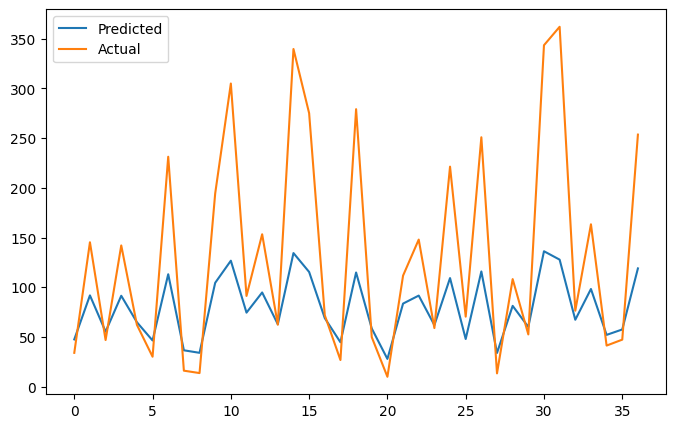

In [ ]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_lcv=lasso_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [ ]:
mse_lcv=mean_squared_error(10**(y_test),10**(y_pred_lcv)) #10** to convert back log10 that we used while making it normalised
rmse_lcv=np.sqrt(mse_lcv)

r2_lcv=r2_score(10**(y_test),10**(y_pred_lcv))
Adjusted_R2_lcv=(1-(1-r2_score(10**(y_test), 10**(y_pred_lcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_lcv = mean_absolute_error(y_test, y_pred_lcv)

In [ ]:
eval_lcv=pd.DataFrame([mse_lcv,rmse_lcv,r2_lcv,Adjusted_R2_lcv,mae_lcv],columns=['Lasso CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_lcv],axis=1) # Concating our metrics of new model into our metrics Dataframe

eval

,Linear,Lasso,Lasso CV
MSE,70.420406,8552.042521,70.224612
RMSE,8.391687,92.477254,8.380013
R2,0.993744,0.240217,0.993761
Adj R2,0.993175,0.171146,0.993194
MAE,0.017328,0.220050,0.017386


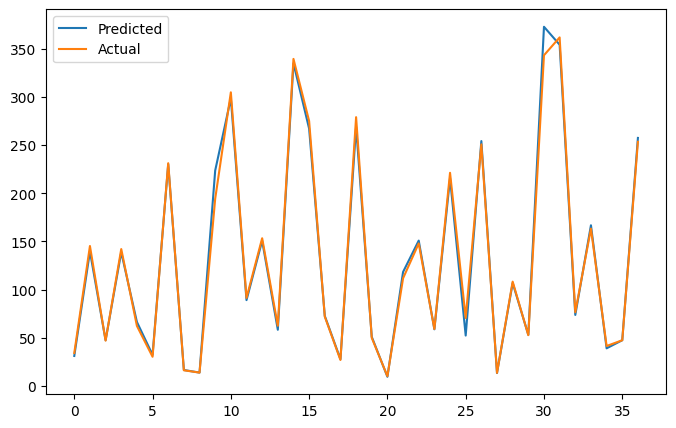

In [ ]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lcv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization.  GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with lasso regularization is doing better compare to all others.

### ML Model - 2 Linear Regression with Ridge Regularization

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred_r=ridge.predict(X_test)


In [ ]:
mse_r=mean_squared_error(10**(y_test),10**(y_pred_r))
#10** to convert back log10 that we used while making it normalised
rmse_r=np.sqrt(mse_r)

r2_r=r2_score(10**(y_test),10**(y_pred_r))
Adjusted_R2_r=1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

from sklearn.metrics import mean_absolute_error

mae_r= mean_absolute_error(y_test, y_pred_r)

In [ ]:
eval_r=pd.DataFrame([mse_r,rmse_r,r2_r,Adjusted_R2_r,mae_r],columns=['Ridge'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_r],axis=1) # Concating our metrics of new model into our metrics Dataframe

eval

,Linear,Lasso,Lasso CV,Ridge
MSE,70.420406,8552.042521,70.224612,166.335296
RMSE,8.391687,92.477254,8.380013,12.897104
R2,0.993744,0.240217,0.993761,0.985222
Adj R2,0.993175,0.171146,0.993194,0.983879
MAE,0.017328,0.220050,0.017386,0.023654


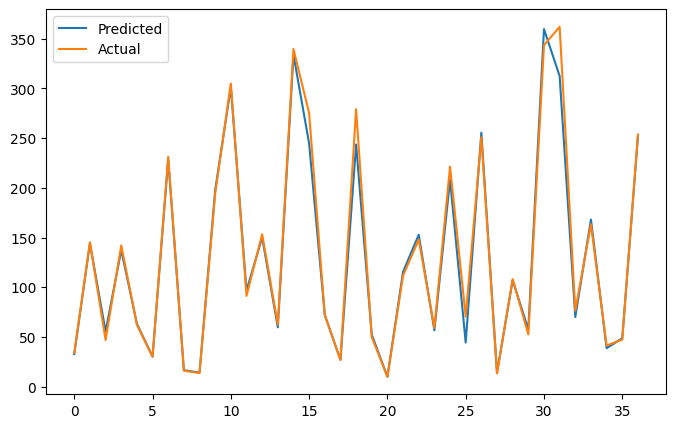

In [ ]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_r))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_rcv=ridge_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528889


In [ ]:
mse_rcv=mean_squared_error(10**(y_test),10**(y_pred_rcv))
#10** to convert back log10 that we used while making it normalised
rmse_rcv=np.sqrt(mse_rcv)

r2_rcv=r2_score(10**(y_test),10**(y_pred_rcv))
Adjusted_R2_rcv=1-(1-r2_score(10**(y_test), 10**(y_pred_rcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


mae_rcv= mean_absolute_error(y_test, y_pred_rcv)


In [ ]:
eval_rcv=pd.DataFrame([mse_rcv,rmse_rcv,r2_rcv,Adjusted_R2_rcv,mae_rcv],columns=['Ridge CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_rcv],axis=1) # Concating our metrics of new model into our metrics Dataframe


In [ ]:
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786
R2,0.993744,0.240217,0.993761,0.985222,0.993784
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219
MAE,0.017328,0.220050,0.017386,0.023654,0.017567


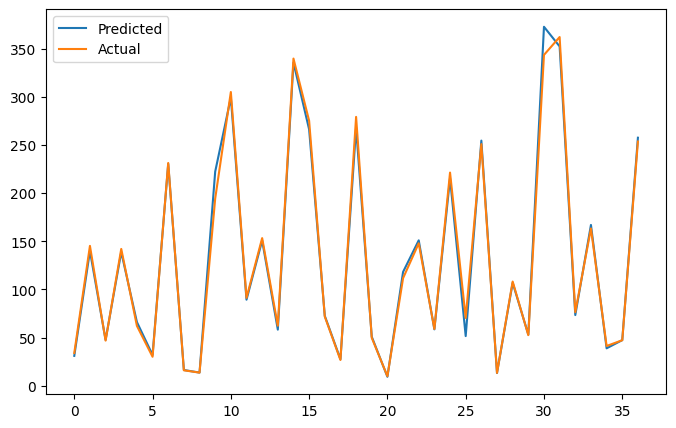

In [ ]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_rcv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization.  GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By looking at above Dataframe we can say that our linear regression with Ridge regularization is doing better compare to all others.

### ML Model - 3 Linear Regression with Elastic Net Regularization

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the Algorithm
elasticnet.fit(X_train,y_train)

# Predict on the model
y_pred_e=elasticnet.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
mse_e=mean_squared_error(10**(y_test),10**(y_pred_e))
#10** to convert back log10 that we used while making it normalised
rmse_e=np.sqrt(mse_e)

r2_e=r2_score(10**(y_test),10**(y_pred_e))
Adjusted_R2_e=1-(1-r2_score(10**(y_test), 10**(y_pred_e)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

mae_e= mean_absolute_error(y_test, y_pred_e)

eval_e=pd.DataFrame([mse_e,rmse_e,r2_e,Adjusted_R2_e,mae_e],columns=['Elastic'],index=['MSE','RMSE','R2','Adj R2','MAE'])

eval=pd.concat([eval,eval_e],axis=1) # Concating our metrics of new model into our metrics Dataframe

In [ ]:
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV,Elastic
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639,7069.422528
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786,84.079858
R2,0.993744,0.240217,0.993761,0.985222,0.993784,0.371936
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219,0.314840
MAE,0.017328,0.220050,0.017386,0.023654,0.017567,0.189681


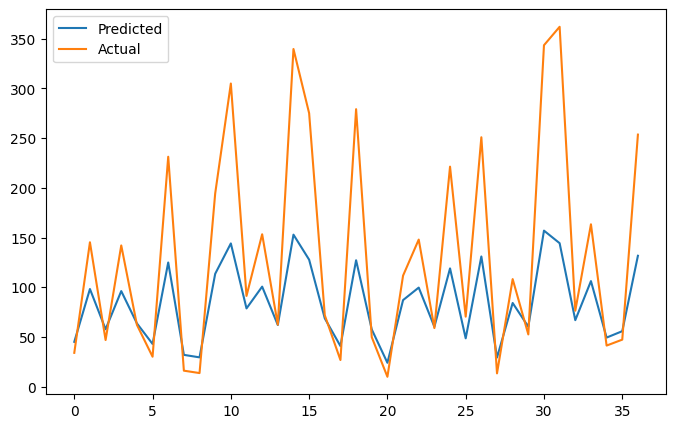

In [ ]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_e))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_ecv = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.3}

Using  {'alpha': 1e-05, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.0011533635660191343


In [ ]:
mse_ecv=mean_squared_error(10**(y_test),10**(y_pred_ecv))
rmse_ecv=np.sqrt(mse_ecv)

r2_ecv=r2_score(10**(y_test),10**(y_pred_ecv))
Adjusted_R2_ecv=1-(1-r2_score(10**(y_test), 10**(y_pred_ecv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

mae_ecv= mean_absolute_error(y_test, y_pred_ecv)

In [ ]:
eval_ecv=pd.DataFrame([mse_ecv,rmse_ecv,r2_ecv,Adjusted_R2_ecv,mae_ecv],columns=['Elastic CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])


In [ ]:
eval=pd.concat([eval,eval_ecv],axis=1) # Concating our metrics of new model into our metrics Dataframe
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV,Elastic,Elastic CV
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639,7069.422528,70.265093
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786,84.079858,8.382428
R2,0.993744,0.240217,0.993761,0.985222,0.993784,0.371936,0.993757
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219,0.314840,0.993190
MAE,0.017328,0.220050,0.017386,0.023654,0.017567,0.189681,0.017371


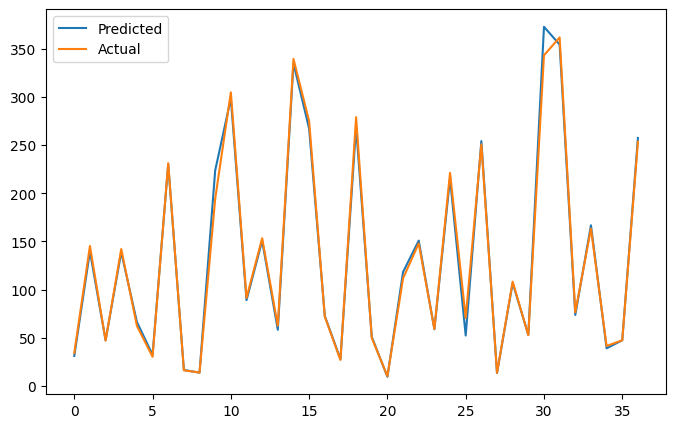

In [ ]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ecv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

Here we use GridSearchCV for optimization.  GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we tried all the possible regularization methods, but among all Ridge CV is performing better than any other model.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Here we consider Mean Squared Error (MSE) and Adjusted R2 (Adj R2) as evalution metrics. 
MSE and Adj R2 as evaluation metrics can have the following positive impacts:
1. Improved accuracy of predictions: By optimizing a model's performance based on MSE and Adj R2, businesses can improve the accuracy of their predictions. This can lead to better decision-making, improved resource allocation, and reduced costs associated with errors or inefficiencies.
2. Improved model selection: By comparing the performance of different models based on MSE and Adj R2, businesses can select the best model for their specific problem. This can lead to improved performance and better outcomes for the business.

Overall, using MSE and Adj R2 as evaluation metrics can help businesses improve the accuracy of their predictions, gain insights into their data and make better decisions.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

So as we decided our evalution metrics as MSE and Adj R2, On the basis of it we choosed our ML model as Ridge CV. 

Ridge regression can help to improve the generalization performance of a model by reducing the impact of multicollinearity and high-dimensional data. However, the choice of the regularization parameter alpha can have a significant impact on the performance of the model.

we choose RidgeCV to estimate the optimal value of the regularization parameter alpha and to ensure that our model is less likely to overfit the training data. By using cross-validation to estimate the optimal value of alpha, we can build a more robust and generalizable model that can perform well on new data.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
best_model=Ridge(alpha=0.01) # RidgeCV Model after Hyperparameter tunning 

In [ ]:
best_model.fit(X_train,y_train) # fit a data into model

Ridge(alpha=0.01)

In [ ]:
X_train.head()

,Open,High,Low
113,2.152533,2.190332,2.127105
8,1.209515,1.321184,1.204663
96,1.965672,2.001734,1.761251
170,1.774517,1.860637,1.612254
45,1.001734,1.243286,0.997386


In [ ]:
best_model.coef_

array([-0.49764104,  0.7878188 ,  0.71306446])

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

explainer = shap.KernelExplainer(best_model.predict, X_train)


In [ ]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/37 [00:00<?, ?it/s]

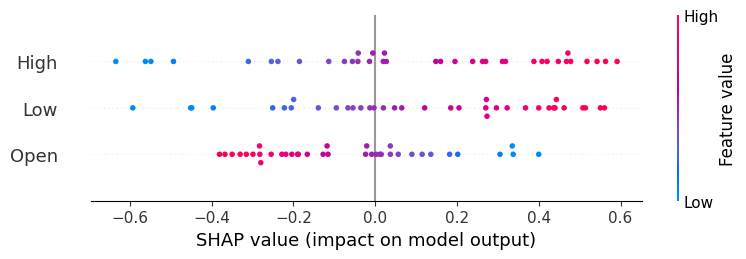

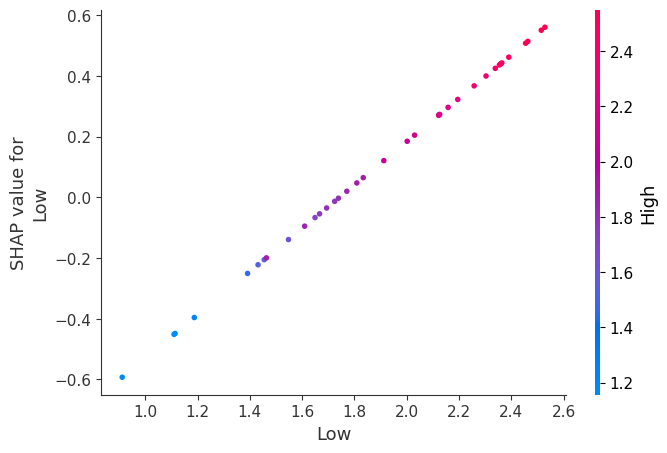

In [ ]:
# creating a summary plot of the SHAP values
shap.summary_plot(shap_values, X_test)

# creating a dependence plot for a specific feature
shap.dependence_plot('Low', shap_values, X_test)

As we take our best performing model as RidgeCV. On the basis of our Hyperparameter Tunning we get our Alpha as 0.01. here we are gonna check feature importance with two methods are as follows:
1. Coefficient : By looking at the coefficient of model we can say that High has most impact on target variable where as Open has negative correlation with target variable 
2. SHAP : SHAP values quantify the contribution of each feature to the predicted outcome for a particular instance. The summary plot shows the features ranked in descending order of importance, based on the mean absolute SHAP values are calculated for each instance in the test set. By examining the summary plot, we can identify High and Low have the strongest impact on the model's predictions.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a joblib file format for deployment process.


In [ ]:
# Save the File
import joblib 
joblib.dump(best_model, 'best_model.joblib') # saving best model in joblib file

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
model = joblib.load('best_model.joblib')

model.predict(X_test)

array([1.49281821, 2.1460464 , 1.67820951, 2.14246687, 1.82078283,
       1.50592846, 2.36237019, 1.21581071, 1.13812524, 2.34689825,
       2.47580699, 1.95136563, 2.1784055 , 1.76583469, 2.52555747,
       2.42499701, 1.86105797, 1.44089765, 2.42766349, 1.70736326,
       0.97288958, 2.07250228, 2.17892937, 1.76813804, 2.33331037,
       1.71279947, 2.40565057, 1.1239751 , 2.02918406, 1.72541452,
       2.5712468 , 2.54678161, 1.86589544, 2.22259265, 1.59034463,
       1.67605547, 2.41074454])

# **Conclusion**

After making model on Yes bank Stock Closing price predication, we want to conclude that Data has multicollinearity. So for dealing with it we preferred to go for different regularization techniques with cross validation. We made every possible model then on the basis of Mean Squared Error (MSE) and Adjusted R2 (Adj r2) we can see our best performing model is RidgeCV with minimal error. With respective model we tried to do some feature importance for model, Where we find out that High is most impacting feature for target variable also Open is negativley impacting the target variable.